In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Read Dataset
df = pd.read_excel("aiml exp 5.xlsx")
print(df.head())

   Fault Current  Type of Fault
0           2.72              0
1           3.52              0
2           1.34              0
3           5.67              0
4           7.29              1


In [2]:
X = df[["Fault Current"]]
y = df["Type of Fault"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build KNN Model
knn = KNeighborsClassifier(n_neighbors=3)   # Using 3 since dataset is small
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [3]:
# Prediction
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


In [4]:
for i in range(len(X_test)):
    print("\nTest data:", X_test.iloc[i].values,
          "| True label:", y_test.iloc[i],
          "| Predicted:", y_pred[i])
    
    if y_test.iloc[i] == y_pred[i]:
        print("Correct prediction")
    else:
        print("Wrong prediction")


Test data: [4.23] | True label: 0 | Predicted: 0
Correct prediction

Test data: [0.32] | True label: 1 | Predicted: 0
Wrong prediction

Test data: [2.72] | True label: 0 | Predicted: 0
Correct prediction


In [5]:
# User Input Prediction
F = float(input("\nEnter Fault Current value: "))
user_df = pd.DataFrame([[F]], columns=["Fault Current"])
predicted_label = knn.predict(user_df)
print("Predicted Fault Type:", predicted_label[0])


Enter Fault Current value:  4.5


Predicted Fault Type: 0


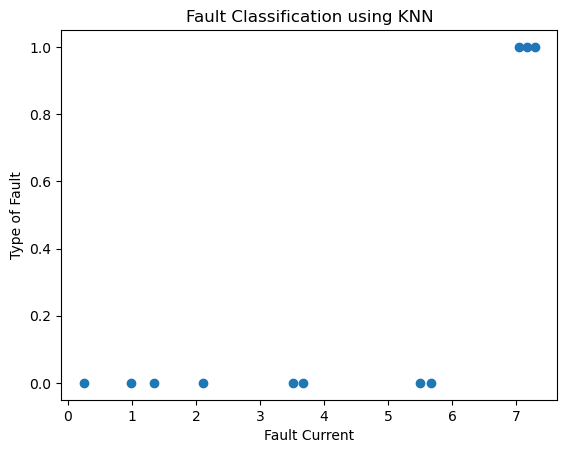

In [6]:
plt.scatter(X_train, y_train)
plt.xlabel("Fault Current")
plt.ylabel("Type of Fault")
plt.title("Fault Classification using KNN")
plt.show()